---
# Capstone Project - The Battle of Neighborhoods
---

In [1]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpl.style.use('ggplot') 

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.3


In [4]:
pd.set_option('display.max_column', 100)
pd.set_option("display.max_rows", 101)

In [5]:
# url https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2019/

In [6]:
df = pd.read_csv('full.csv')
df.head()

/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id_mutation date_mutation  numero_disposition nature_mutation  \
0      2019-1    2019-01-04                   1           Vente   
1      2019-2    2019-01-04                   1           Vente   
2      2019-2    2019-01-04                   1           Vente   
3      2019-3    2019-01-08                   1           Vente   
4      2019-4    2019-01-07                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe     adresse_nom_voie  \
0          37220.0            26.0             NaN     RUE DE MONTHOLON   
1         185100.0            22.0             NaN  RUE GEN DELESTRAINT   
2         185100.0            22.0               B  RUE GEN DELESTRAINT   
3         209000.0             3.0             NaN   RUE DES CHAMPAGNES   
4         134900.0             5.0             NaN        LOT LE BIOLAY   

  adresse_code_voie  code_postal code_commune            nom_commune  \
0              2730       1000.0         1053        Bourg-en-Bresse   
1              1650       1000.0         1053        Bourg-en-Bresse   
2              1650       1000.0         1053        Bourg-en-Bresse   
3              0043       1160.0         1314                  Priay   
4              A003       1370.0         1350  Saint-Étienne-du-Bois   

  code_departement  ancien_code_commune ancien_nom_commune     id_parcelle  \
0                1                  NaN                NaN  01053000AI0298   
1                1                  NaN                NaN  01053000AM0095   
2                1                  NaN                NaN  01053000AM0095   
3                1                  NaN                NaN  013140000E1676   
4                1                  NaN                NaN  01350000AA0011   

  ancien_id_parcelle numero_volume lot1_numero  lot1_surface_carrez  \
0                NaN           NaN           8                19.27   
1                NaN           NaN         137                  NaN   
2                NaN           NaN           7                  NaN   
3                NaN           NaN         NaN                  NaN   
4                NaN           NaN         NaN                  NaN   

  lot2_numero  lot2_surface_carrez lot3_numero  lot3_surface_carrez  \
0         NaN                  NaN         NaN                  NaN   
1         154                61.51         NaN                  NaN   
2         NaN                  NaN         NaN                  NaN   
3         NaN                  NaN         NaN                  NaN   
4         NaN                  NaN         NaN                  NaN   

   lot4_numero  lot4_surface_carrez  lot5_numero  lot5_surface_carrez  \
0          NaN                  NaN          NaN                  NaN   
1          NaN                  NaN          NaN                  NaN   
2          NaN                  NaN          NaN                  NaN   
3          NaN                  NaN          NaN                  NaN   
4          NaN                  NaN          NaN                  NaN   

   nombre_lots  code_type_local   type_local  surface_reelle_bati  \
0            1              2.0  Appartement                 20.0   
1            2              2.0  Appartement                 62.0   
2            1              3.0   Dépendance                  NaN   
3            0              1.0       Maison                 90.0   
4            0              1.0       Maison                101.0   

   nombre_pieces_principales code_nature_culture nature_culture  \
0                        1.0                 NaN            NaN   
1                        3.0                 NaN            NaN   
2                        0.0                 NaN            NaN   
3                        4.0                   S           sols   
4                        5.0                   S           sols   

  code_nature_culture_speciale nature_culture_speciale  surface_terrain  \
0                          NaN                     NaN      

In [7]:
df.shape

(2535791, 40)

## Select data of *North Department*

In [8]:
df_nord = df[df['code_departement'] == 59]
print(df_nord.shape)
df_nord.head()

(78266, 40)


id_mutation date_mutation  numero_disposition nature_mutation  \
1432150  2019-588890    2019-01-04                   1           Vente   
1432151  2019-588890    2019-01-04                   1           Vente   
1432152  2019-588891    2019-01-04                   1           Vente   
1432153  2019-588891    2019-01-04                   1           Vente   
1432154  2019-588892    2019-01-04                   1           Vente   

         valeur_fonciere  adresse_numero adresse_suffixe  \
1432150         190500.0             1.0             NaN   
1432151         190500.0             1.0             NaN   
1432152         116000.0            26.0             NaN   
1432153         116000.0            26.0             NaN   
1432154           8000.0            14.0             NaN   

                 adresse_nom_voie adresse_code_voie  code_postal code_commune  \
1432150     ALL DU GENERAL KOENIG              0488      59130.0        59328   
1432151     ALL DU GENERAL KOENIG              0488      59130.0        59328   
1432152  AV DU MARECHAL DE LATTRE              0650      59350.0        59527   
1432153  AV DU MARECHAL DE LATTRE              0650      59350.0        59527   
1432154         AV DE LA ROSERAIE              7609      59000.0        59350   

                   nom_commune code_departement  ancien_code_commune  \
1432150             Lambersart               59                  NaN   
1432151             Lambersart               59                  NaN   
1432152  Saint-André-lez-Lille               59                  NaN   
1432153  Saint-André-lez-Lille               59                  NaN   
1432154                  Lille               59                  NaN   

        ancien_nom_commune     id_parcelle ancien_id_parcelle numero_volume  \
1432150                NaN  59328000AO0730                NaN           NaN   
1432151                NaN  59328000AO0734                NaN           NaN   
1432152                NaN  59527000AS0067                NaN           NaN   
1432153                NaN  59527000AS0067                NaN           NaN   
1432154                NaN  59350000ER0185                NaN           NaN   

        lot1_numero  lot1_surface_carrez lot2_numero  lot2_surface_carrez  \
1432150          34                  NaN          88                  NaN   
1432151          14                  NaN         NaN                  NaN   
1432152         518                43.03         NaN                  NaN   
1432153          92                  NaN         NaN                  NaN   
1432154         102                  NaN         NaN                  NaN   

        lot3_numero  lot3_surface_carrez  lot4_numero  lot4_surface_carrez  \
1432150         NaN                  NaN          NaN                  NaN   
1432151         NaN                  NaN          NaN                  NaN   
1432152         NaN                  NaN          NaN                  NaN   
1432153         NaN                  NaN          NaN                  NaN   
1432154         NaN                  NaN          NaN                  NaN   

         lot5_numero  lot5_surface_carrez  nombre_lots  code_type_local  \
1432150          NaN                  NaN            2              2.0   
1432151          NaN                  NaN            1              3.0   
1432152          NaN                  NaN            1              2.0   
1432153          NaN                  NaN            1              3.0   
1432154          NaN                  NaN            1              3.0   

          type_local  surface_reelle_bati  nombre_pieces_principales  \
1432150  Appartement                 81.0                        4.0   
1432151   Dépendance                  NaN                        0.0   
1432152  Appartement                 42.0                        2.0   
1432153   Dépendance                  NaN                        0.0   
1432154   Dépendance                  NaN                        

## Scraping data of *La métropole de Lille*

In [9]:
url = 'https://fr.wikipedia.org/wiki/M%C3%A9tropole_europ%C3%A9enne_de_Lille'
dfs = pd.read_html(url)

print(len(dfs))

29


In [10]:
df_lille = dfs[1]
print(df_lille.shape)
df_lille.head()

(95, 6)


Nom  Code Insee       Gentilé  Superficie (km2)  \
0         Lille(siège)       59350       Lillois              3483   
1  Allennes-les-Marais       59005     Allennois               555   
2            Annœullin       59011  Annœullinois               901   
3             Anstaing       59013     Anstinois                23   
4          Armentières       59017  Armentiérois               628   

  Population (dernière pop. légale) Densité (hab./km2)  
0                    232 787 (2017)              6 684  
1                      3 460 (2017)                623  
2                     10 428 (2017)              1 157  
3                      1 469 (2017)                639  
4                     24 882 (2017)              3 962

## Select data of *La Métropole de Lille (MEL)*

In [139]:
code = df_lille['Code Insee']
df_mel = df_nord[df_nord['code_commune'].isin(code)]
print(df_mel.shape)
df_mel.head()

(42395, 40)


id_mutation date_mutation  numero_disposition nature_mutation  \
1432150  2019-588890    2019-01-04                   1           Vente   
1432151  2019-588890    2019-01-04                   1           Vente   
1432152  2019-588891    2019-01-04                   1           Vente   
1432153  2019-588891    2019-01-04                   1           Vente   
1432154  2019-588892    2019-01-04                   1           Vente   

         valeur_fonciere  adresse_numero adresse_suffixe  \
1432150         190500.0             1.0             NaN   
1432151         190500.0             1.0             NaN   
1432152         116000.0            26.0             NaN   
1432153         116000.0            26.0             NaN   
1432154           8000.0            14.0             NaN   

                 adresse_nom_voie adresse_code_voie  code_postal code_commune  \
1432150     ALL DU GENERAL KOENIG              0488      59130.0        59328   
1432151     ALL DU GENERAL KOENIG              0488      59130.0        59328   
1432152  AV DU MARECHAL DE LATTRE              0650      59350.0        59527   
1432153  AV DU MARECHAL DE LATTRE              0650      59350.0        59527   
1432154         AV DE LA ROSERAIE              7609      59000.0        59350   

                   nom_commune code_departement  ancien_code_commune  \
1432150             Lambersart               59                  NaN   
1432151             Lambersart               59                  NaN   
1432152  Saint-André-lez-Lille               59                  NaN   
1432153  Saint-André-lez-Lille               59                  NaN   
1432154                  Lille               59                  NaN   

        ancien_nom_commune     id_parcelle ancien_id_parcelle numero_volume  \
1432150                NaN  59328000AO0730                NaN           NaN   
1432151                NaN  59328000AO0734                NaN           NaN   
1432152                NaN  59527000AS0067                NaN           NaN   
1432153                NaN  59527000AS0067                NaN           NaN   
1432154                NaN  59350000ER0185                NaN           NaN   

        lot1_numero  lot1_surface_carrez lot2_numero  lot2_surface_carrez  \
1432150          34                  NaN          88                  NaN   
1432151          14                  NaN         NaN                  NaN   
1432152         518                43.03         NaN                  NaN   
1432153          92                  NaN         NaN                  NaN   
1432154         102                  NaN         NaN                  NaN   

        lot3_numero  lot3_surface_carrez  lot4_numero  lot4_surface_carrez  \
1432150         NaN                  NaN          NaN                  NaN   
1432151         NaN                  NaN          NaN                  NaN   
1432152         NaN                  NaN          NaN                  NaN   
1432153         NaN                  NaN          NaN                  NaN   
1432154         NaN                  NaN          NaN                  NaN   

         lot5_numero  lot5_surface_carrez  nombre_lots  code_type_local  \
1432150          NaN                  NaN            2              2.0   
1432151          NaN                  NaN            1              3.0   
1432152          NaN                  NaN            1              2.0   
1432153          NaN                  NaN            1              3.0   
1432154          NaN                  NaN            1              3.0   

          type_local  surface_reelle_bati  nombre_pieces_principales  \
1432150  Appartement                 81.0                        4.0   
1432151   Dépendance                  NaN                        0.0   
1432152  Appartement                 42.0                        2.0   
1432153   Dépendance                  NaN                        0.0   
1432154   Dépendance                  NaN                        

## Let's select columns of interest

In [140]:
col = ['nature_mutation', 'valeur_fonciere', 'nom_commune', 'nombre_lots', 'type_local', 'surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude']
lille_data = df_mel[col]
lille_data.head()

nature_mutation  valeur_fonciere            nom_commune  nombre_lots  \
1432150           Vente         190500.0             Lambersart            2   
1432151           Vente         190500.0             Lambersart            1   
1432152           Vente         116000.0  Saint-André-lez-Lille            1   
1432153           Vente         116000.0  Saint-André-lez-Lille            1   
1432154           Vente           8000.0                  Lille            1   

          type_local  surface_reelle_bati  nombre_pieces_principales  \
1432150  Appartement                 81.0                        4.0   
1432151   Dépendance                  NaN                        0.0   
1432152  Appartement                 42.0                        2.0   
1432153   Dépendance                  NaN                        0.0   
1432154   Dépendance                  NaN                        0.0   

         longitude   latitude  
1432150   3.015595  50.651965  
1432151   3.015007  50.652149  
1432152   3.045852  50.655648  
1432153   3.045852  50.655648  
1432154   3.029126  50.633852

## Data Cleaning

In [141]:
lille_data.shape

(42395, 9)

In [142]:
lille_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42395 entries, 1432150 to 1476838
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nature_mutation            42395 non-null  object 
 1   valeur_fonciere            41956 non-null  float64
 2   nom_commune                42395 non-null  object 
 3   nombre_lots                42395 non-null  int64  
 4   type_local                 30846 non-null  object 
 5   surface_reelle_bati        23328 non-null  float64
 6   nombre_pieces_principales  30817 non-null  float64
 7   longitude                  41802 non-null  float64
 8   latitude                   41802 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.2+ MB


In [143]:
lille_data.describe()

valeur_fonciere   nombre_lots  surface_reelle_bati  \
count     4.195600e+04  42395.000000         23328.000000   
mean      4.580311e+05      0.548602           107.007673   
std       1.332676e+06      0.964441           367.405661   
min       1.500000e-01      0.000000             1.000000   
25%       1.280000e+05      0.000000            47.000000   
50%       1.900000e+05      0.000000            74.000000   
75%       3.050000e+05      1.000000           100.000000   
max       7.603200e+07     50.000000         18613.000000   

       nombre_pieces_principales     longitude      latitude  
count               30817.000000  41802.000000  41802.000000  
mean                    2.370153      3.076091     50.655268  
std                     2.141923      0.083922      0.051158  
min                     0.000000      2.793345     50.502458  
25%                     0.000000      3.041549     50.623725  
50%                     2.000000      3.073739     50.648933  
75%                     4.000000      3.142746     50.687540  
max                    14.000000      3.264147     50.787692

In [144]:
lille_data.describe(include = 'object')

nature_mutation nom_commune type_local
count            42395       42395      30846
unique               5          95          4
top              Vente       Lille     Maison
freq             35606       11705      11390

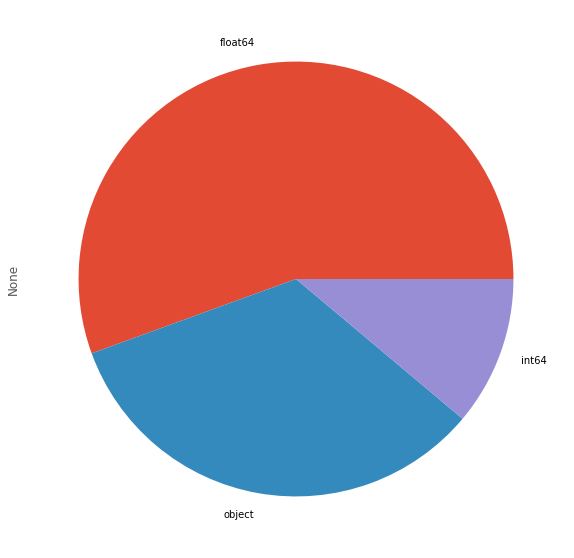

In [145]:
lille_data.dtypes.value_counts().plot.pie(figsize=(15,10))

#### NAs imputation

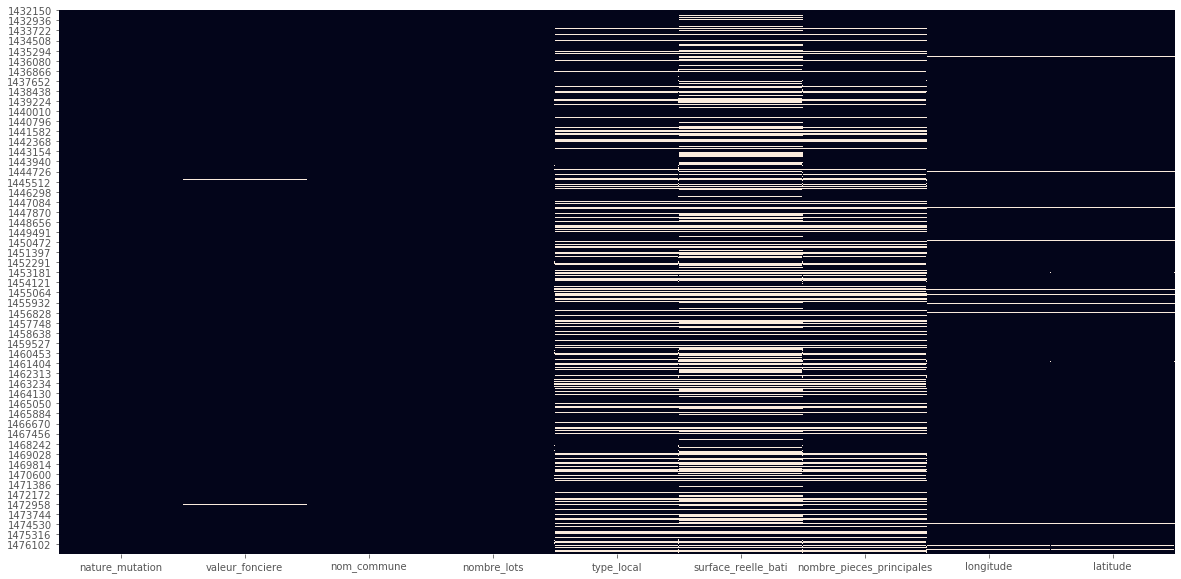

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(lille_data.isna(), cbar=False)

As we can see there are too many NAs in our dataset

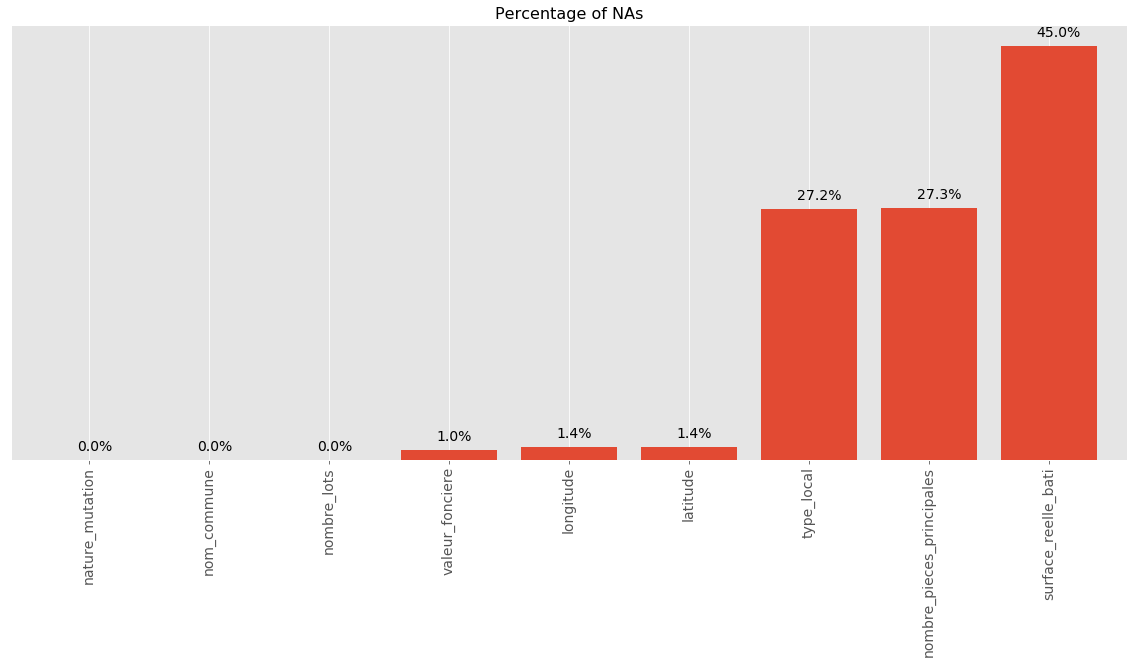

In [149]:
ax = (lille_data.isna().sum()/lille_data.shape[0]).sort_values(ascending=True).plot(kind='bar', figsize=(20, 8), width = 0.8, fontsize = 14)

ax.set_title('Percentage of NAs', fontsize = 16)
#ax.legend(['Very interested', 'Somewhat interested', 'Not interested'], fontsize=14)
ax.get_yaxis().set_visible(False)


#plt.figure(figsize=(20,10))
#(lille_data.isna().sum()/lille_data.shape[0]).sort_values(ascending=True).plot(kind = 'barh')



for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1%}'.format(height), (x + 0.3, y + height + 0.01), fontsize = 14)

#### Let's delete variable with more than 40 percent of NAs

In [19]:
#lille_data.drop('surface_reelle_bati', axis = 1, inplace = True)

The variable *surface_reelle_bati* has 45% of NAs, but we will keep it because it's important to compare the price of housing, the surface area and the municipalities.

#### Let's drop rows with NAs

In [150]:
print('Data shape before droping rows : ', lille_data.shape)
lille_data.dropna(axis = 0, inplace = True)
print('Data shape after droping rows : ', lille_data.shape)

Data shape before droping rows :  (42395, 9)
Data shape after droping rows :  (23170, 9)


/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Outliers imputation

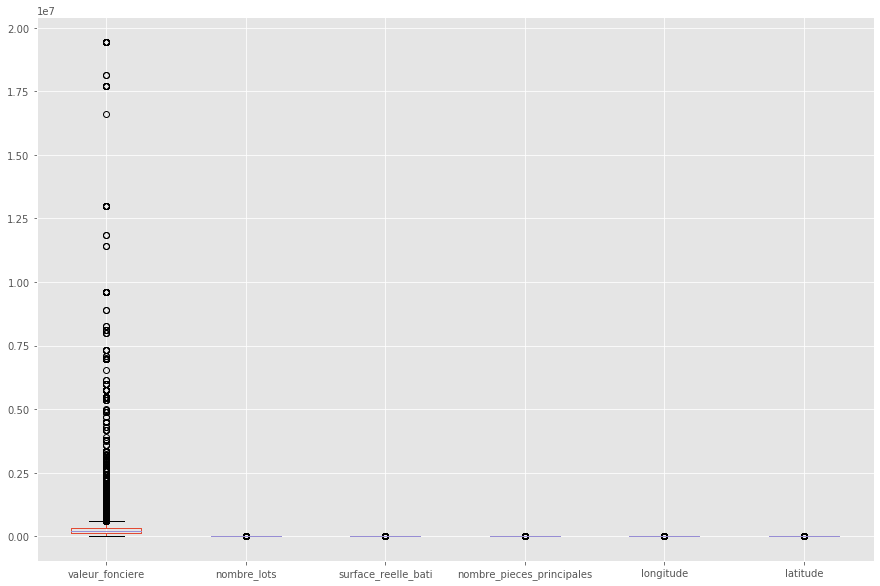

In [151]:
lille_data.plot(kind = 'box', figsize=(15,10))
plt.show()

#### Too much outliers in the variable *valeur_fonciere*. Let's see in details:
- house prices according to local type
- house prices according to local type

In [152]:
lille_data['type_local'].value_counts(normalize=True)

Maison                                      0.488606
Appartement                                 0.397195
Local industriel. commercial ou assimilé    0.114199
Name: type_local, dtype: float64

- 50% of transactions concern houses
- 40% of transactions concern apartments
- Only 10% of transactions concern industrial premises

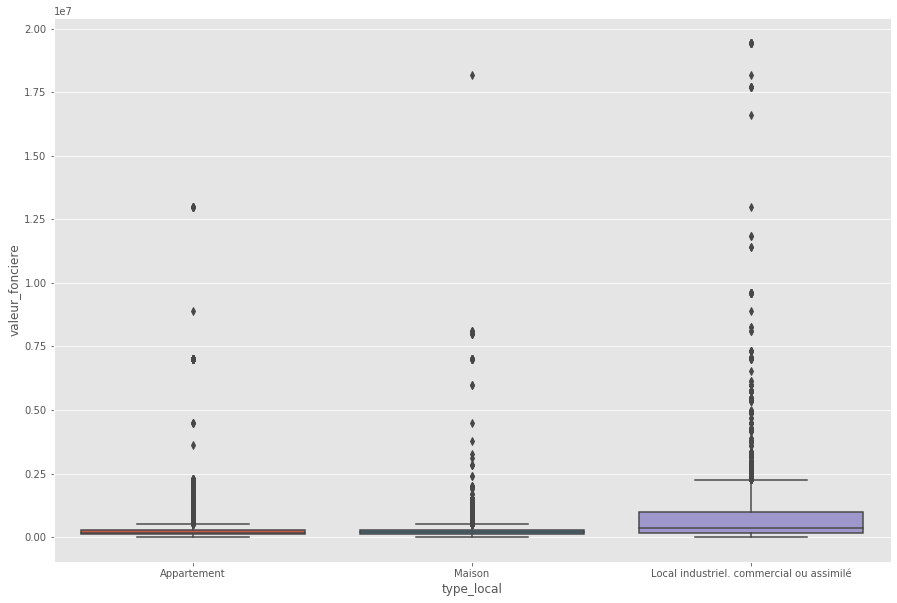

In [153]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = "type_local", y = "valeur_fonciere", data = lille_data)
plt.show()

We know that industrial premises are only 10% of transactions. But the prices of industrial premises vary more than those of houses or apartments.

In [155]:
lille_data.groupby('type_local').median()

valeur_fonciere  nombre_lots  \
type_local                                                               
Appartement                                      169000.0            1   
Local industriel. commercial ou assimilé         350000.0            0   
Maison                                           194200.0            0   

                                          surface_reelle_bati  \
type_local                                                      
Appartement                                              49.0   
Local industriel. commercial ou assimilé                 67.0   
Maison                                                   89.0   

                                          nombre_pieces_principales  \
type_local                                                            
Appartement                                                     2.0   
Local industriel. commercial ou assimilé                        0.0   
Maison                                                          4.0   

                                          longitude   latitude  
type_local                                                      
Appartement                                3.066674  50.638416  
Local industriel. commercial ou assimilé   3.074159  50.648694  
Maison                                     3.091216  50.665261

In [156]:
df_11 = lille_data[lille_data['type_local'] == 'Maison']
df_22 = lille_data[lille_data['type_local'] == "Appartement"]
df_33 = lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']

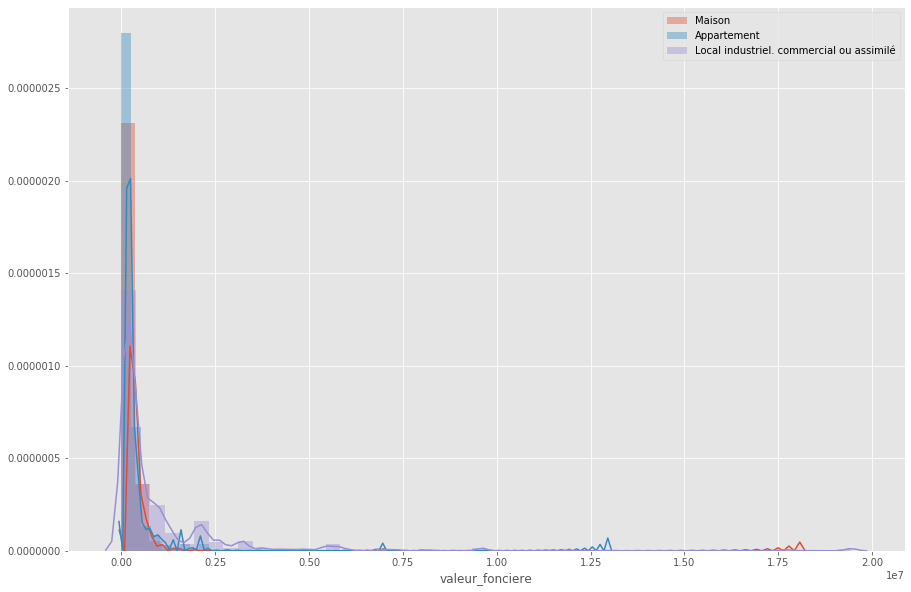

In [157]:
plt.figure(figsize=(15,10))
sns.distplot(df_11["valeur_fonciere"], label='Maison')
sns.distplot(df_22["valeur_fonciere"], label='Appartement')
sns.distplot(df_33["valeur_fonciere"], label='Local industriel. commercial ou assimilé')
plt.legend()

In [159]:
lille_data['nature_mutation'].value_counts()

Vente                                 22680
Vente en l'état futur d'achèvement      306
Adjudication                            152
Echange                                  26
Vente terrain à bâtir                     6
Name: nature_mutation, dtype: int64

In [160]:
df_1 = lille_data[lille_data['nature_mutation'] == 'Vente']
df_2 = lille_data[lille_data['nature_mutation'] == "Vente en l'état futur d'achèvement"]
df_3 = lille_data[lille_data['nature_mutation'] == 'Adjudication']
df_4 = lille_data[lille_data['nature_mutation'] == 'Echange']
df_5 = lille_data[lille_data['nature_mutation'] == 'Vente terrain à bâtir']

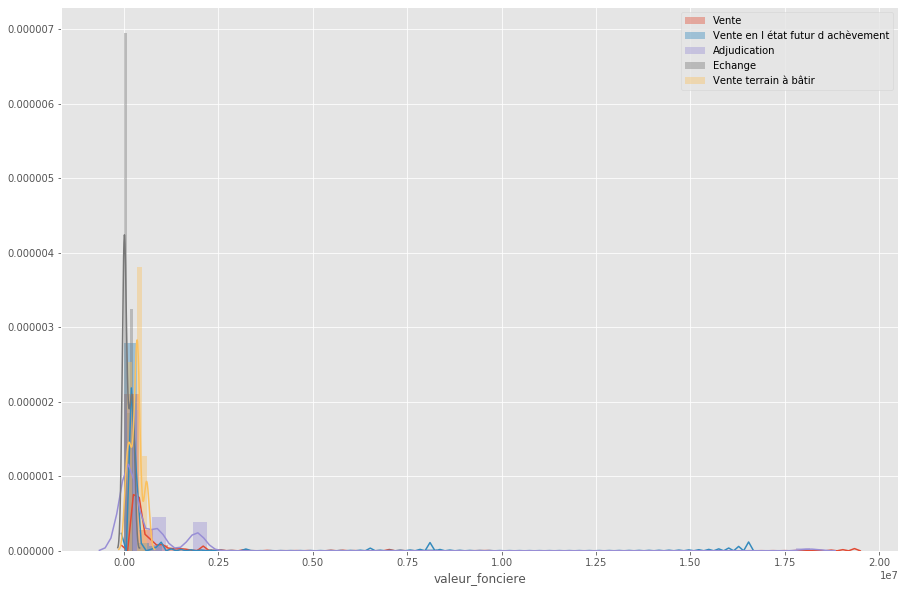

In [161]:
plt.figure(figsize=(15,10))
sns.distplot(df_1["valeur_fonciere"], label='Vente')
sns.distplot(df_2["valeur_fonciere"], label='Vente en l état futur d achèvement')
sns.distplot(df_3["valeur_fonciere"], label='Adjudication')
sns.distplot(df_4["valeur_fonciere"], label='Echange')
sns.distplot(df_5["valeur_fonciere"], label='Vente terrain à bâtir')
plt.legend()

### Let's remove outliers from housing pricing by local type

In [165]:
# Maison
Q1 = lille_data[lille_data['type_local'] == 'Maison']['valeur_fonciere'].quantile(0.25)
Q3 = lille_data[lille_data['type_local'] == 'Maison']['valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter_ = (lille_data[lille_data['type_local'] == 'Maison']['valeur_fonciere'] >= Q1 - 1.5 * IQR) & (lille_data[lille_data['type_local'] == 'Maison']['valeur_fonciere'] <= Q3 + 1.5 *IQR)
df_11 = lille_data[lille_data['type_local'] == 'Maison'].loc[filter_]
print(df_11.shape)
#lille_data.head()

(10111, 9)


In [166]:
# Appartement
Q1 = lille_data[lille_data['type_local'] == 'Appartement']['valeur_fonciere'].quantile(0.25)
Q3 = lille_data[lille_data['type_local'] == 'Appartement']['valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter_ = (lille_data[lille_data['type_local'] == 'Appartement']['valeur_fonciere'] >= Q1 - 1.5 * IQR) & (lille_data[lille_data['type_local'] == 'Appartement']['valeur_fonciere'] <= Q3 + 1.5 *IQR)
df_22 = lille_data[lille_data['type_local'] == 'Appartement'].loc[filter_]
print(df_22.shape)


(7931, 9)


In [167]:
# Local industriel. commercial ou assimilé
Q1 = lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere'].quantile(0.25)
Q3 = lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter_ = (lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere'] >= Q1 - 1.5 * IQR) & (lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere'] <= Q3 + 1.5 *IQR)
df_33 = lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé'].loc[filter_]
print(df_33.shape)

(2175, 9)


#### Let's concatenate the 3 dataFrame

In [169]:
df_11 = df_11.append(df_22)
df_11.shape

(18042, 9)

In [170]:
lille_data = df_11.append(df_33)
lille_data = lille_data.reset_index()
lille_data.shape

(20217, 10)

#### Let's plot again the distributions

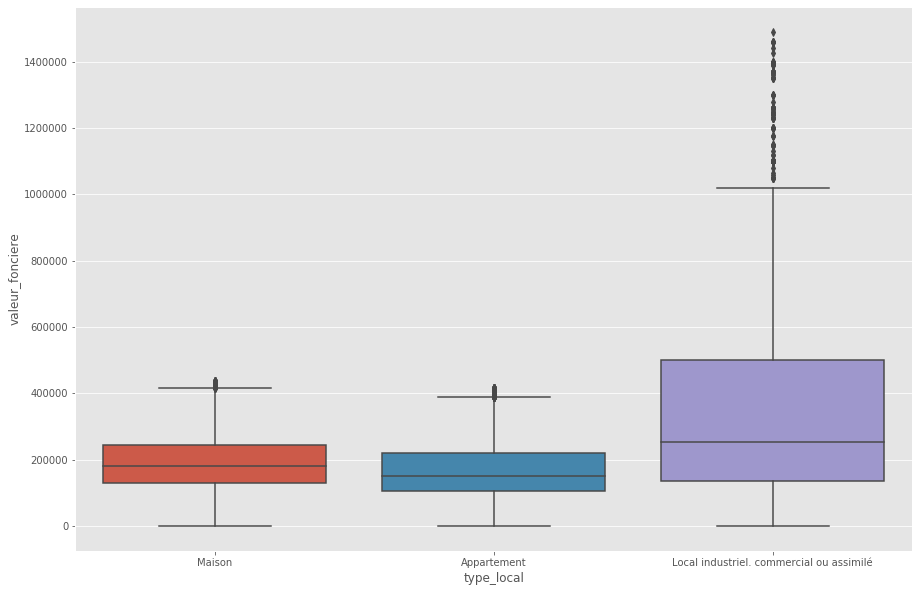

In [171]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = "type_local", y = "valeur_fonciere", data = lille_data)
plt.show()

In [172]:
df_11 = lille_data[lille_data['type_local'] == 'Maison']
df_22 = lille_data[lille_data['type_local'] == "Appartement"]
df_33 = lille_data[lille_data['type_local'] == 'Local industriel. commercial ou assimilé']

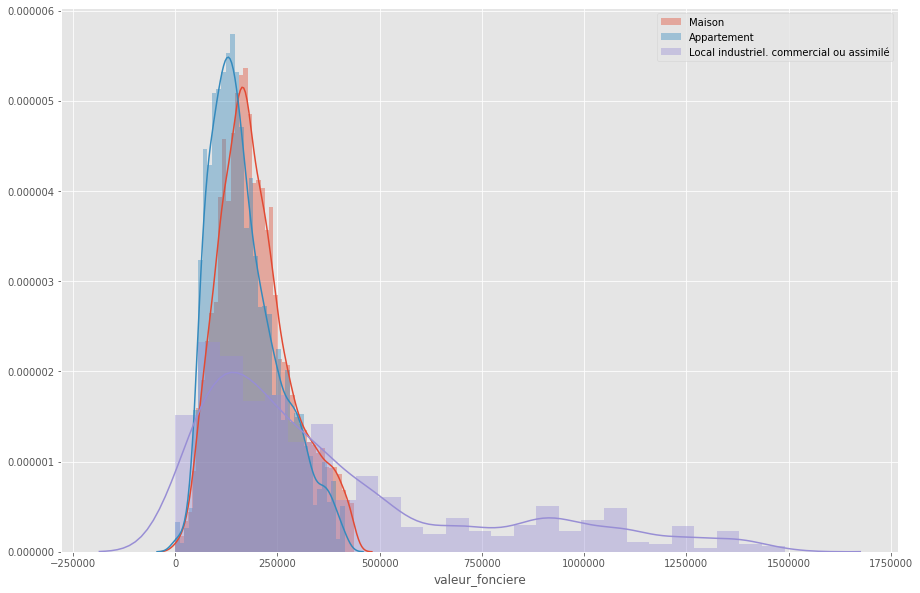

In [173]:
plt.figure(figsize=(15,10))
sns.distplot(df_11["valeur_fonciere"], label='Maison')
sns.distplot(df_22["valeur_fonciere"], label='Appartement')
sns.distplot(df_33["valeur_fonciere"], label='Local industriel. commercial ou assimilé')
plt.legend()

In [174]:
df_1 = lille_data[lille_data['nature_mutation'] == 'Vente']
df_2 = lille_data[lille_data['nature_mutation'] == "Vente en l'état futur d'achèvement"]
df_3 = lille_data[lille_data['nature_mutation'] == 'Adjudication']
df_4 = lille_data[lille_data['nature_mutation'] == 'Echange']
df_5 = lille_data[lille_data['nature_mutation'] == 'Vente terrain à bâtir']

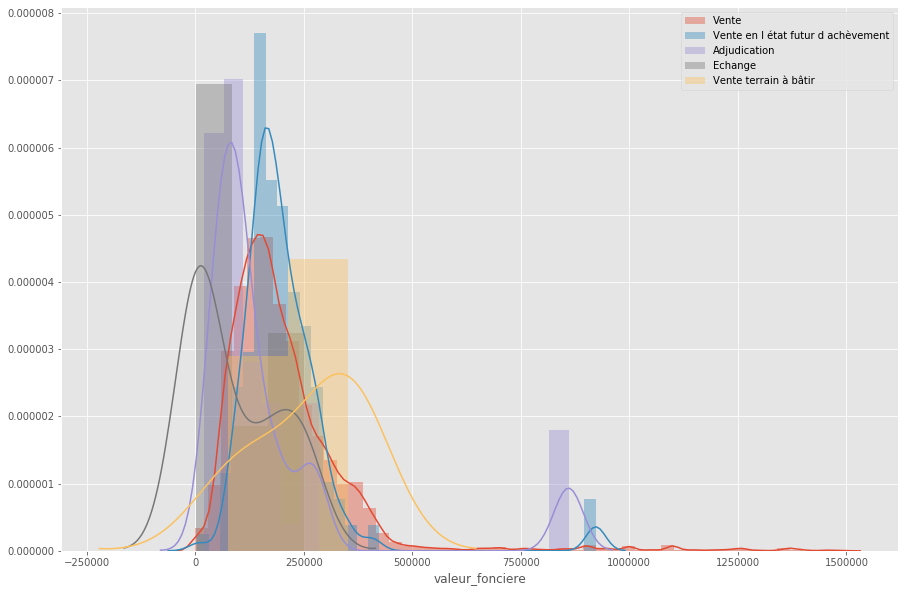

In [175]:
plt.figure(figsize=(15,10))
sns.distplot(df_1["valeur_fonciere"], label='Vente')
sns.distplot(df_2["valeur_fonciere"], label='Vente en l état futur d achèvement')
sns.distplot(df_3["valeur_fonciere"], label='Adjudication')
sns.distplot(df_4["valeur_fonciere"], label='Echange')
sns.distplot(df_5["valeur_fonciere"], label='Vente terrain à bâtir')
plt.legend()

## Exploratory Data Analysis (EDA)

In [176]:
lille_data['nombre_pieces_principales'].value_counts()

4.0     4553
3.0     3826
5.0     3307
2.0     3074
0.0     2184
1.0     1974
6.0      929
7.0      254
8.0       83
9.0       19
10.0       6
11.0       5
13.0       3
Name: nombre_pieces_principales, dtype: int64

### Columns analysis

#### nature_mutation

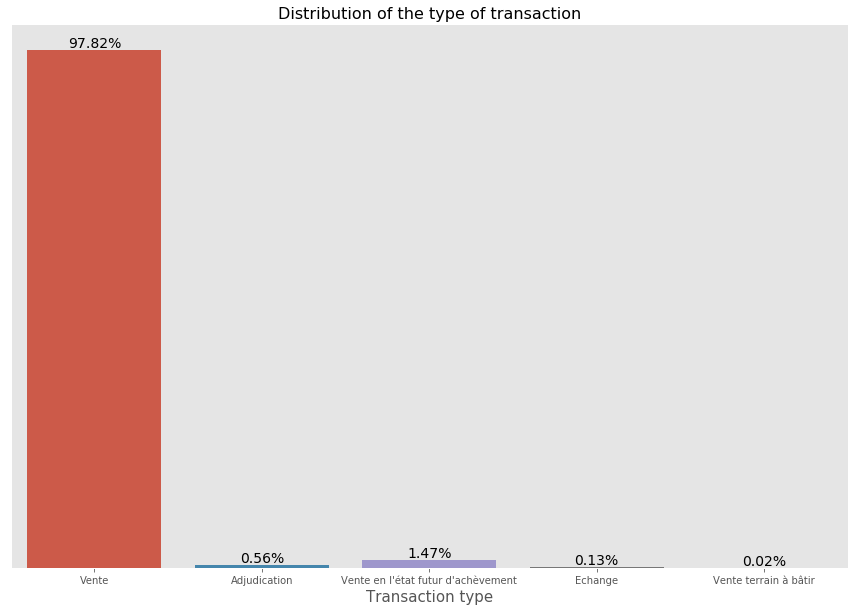

In [278]:
fig = plt.figure(figsize = (15, 10))

ax = sns.countplot(x = 'nature_mutation', data = lille_data)



ax.set_title('Distribution of the type of transaction', fontsize = 16)
#ax.legend(['Very interested', 'Somewhat interested', 'Not interested'], fontsize=14)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Transaction type', fontsize = 15)
ax.set_ylabel('rate', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/20217), (x+0.4, y + height + 0.01), 
                fontsize = 14,
                ha='center', va='bottom')

In [277]:

"""
plt.figure(figsize=(15,10))
sns.countplot(x = 'nature_mutation', data = lille_data)
plt.title("Distribution de la variable 'nature mutation'")
plt.xticks(rotation = 90)
plt.show()
"""

'\nplt.figure(figsize=(15,10))\nsns.countplot(x = \'nature_mutation\', data = lille_data)\nplt.title("Distribution de la variable \'nature mutation\'")\nplt.xticks(rotation = 90)\nplt.show()\n'

#### type_local

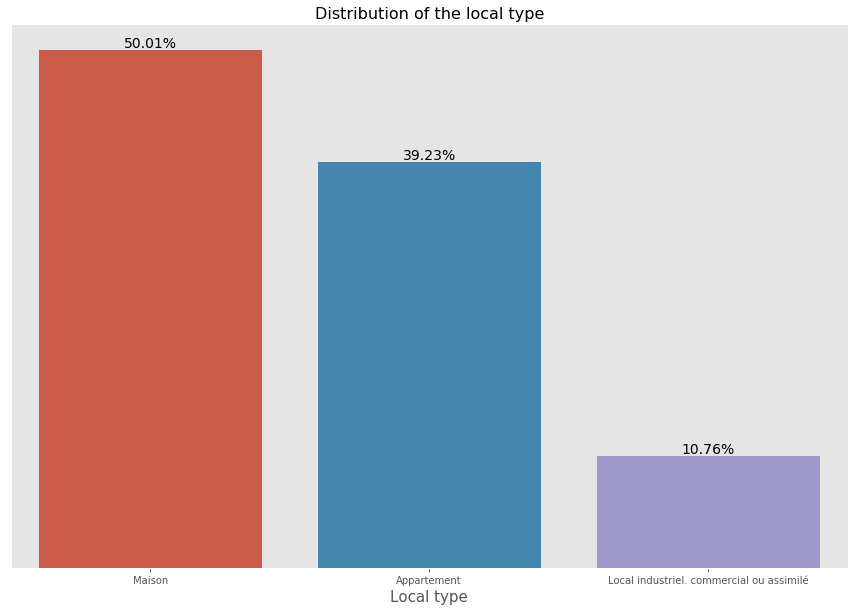

In [279]:
fig = plt.figure(figsize = (15, 10))

ax = sns.countplot(x = 'type_local', data = lille_data)



ax.set_title('Distribution of the local type', fontsize = 16)
#ax.legend(['Very interested', 'Somewhat interested', 'Not interested'], fontsize=14)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Local type', fontsize = 15)
ax.set_ylabel('rate', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/20217), (x+0.4, y + height + 0.01), 
                fontsize = 14,
                ha='center', va='bottom')

In [280]:

"""
plt.figure(figsize=(15,10))
sns.countplot(x = 'type_local', data = lille_data)
plt.title("Distribution de la variable 'type_local'")
plt.xticks(rotation = 90)
plt.show()
"""

'\nplt.figure(figsize=(15,10))\nsns.countplot(x = \'type_local\', data = lille_data)\nplt.title("Distribution de la variable \'type_local\'")\nplt.xticks(rotation = 90)\nplt.show()\n'

#### nom_commune

Let's plot the 20 cities with the most housing transaction

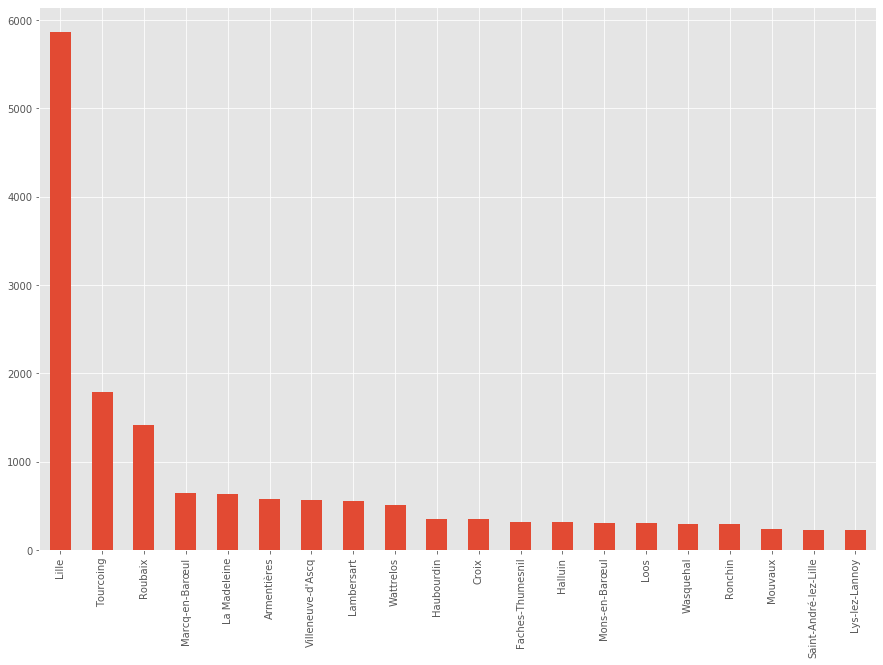

In [182]:
plt.figure(figsize=(15,10))
lille_data['nom_commune'].value_counts()[0:20].plot(kind = 'bar')
plt.show()

Without surprise, Lille is the city with the most transaction, among 7000. Next, we are Tourcoing and Roubaix.

In [186]:
lille_data.groupby(['type_local', 'nom_commune']).mean()#.sort_values(by=['valeur_fonciere'], ascending=False)

index  valeur_fonciere  nombre_lots  \
type_local  nom_commune                                               
Appartement Annœullin    1.456508e+06    143363.047619     0.904762   
            Anstaing     1.456875e+06    227500.000000     1.000000   
            Armentières  1.470973e+06    147420.711937     0.895288   
            Aubers       1.449164e+06    184000.000000     1.000000   
            Baisieux     1.458101e+06    207395.000000     0.833333   
...                               ...              ...          ...   
Maison      Wattrelos    1.457519e+06    151075.302217     0.002410   
            Wavrin       1.456903e+06    193043.443182     0.011364   
            Wervicq-Sud  1.470562e+06    264075.652174     0.000000   
            Wicres       1.457604e+06    296711.111111     0.000000   
            Willems      1.456540e+06    218744.634146     0.000000   

                         surface_reelle_bati  nombre_pieces_principales  \
type_local  nom_commune                                                   
Appartement Annœullin              65.714286                   2.857143   
            Anstaing               65.000000                   2.500000   
            Armentières            56.439791                   2.329843   
            Aubers                 95.000000                   3.000000   
            Baisieux               57.333333                   2.666667   
...                                      ...                        ...   
Maison      Wattrelos              88.016867                   4.161446   
            Wavrin                 91.204545                   4.204545   
            Wervicq-Sud           105.152174                   4.630435   
            Wicres                122.888889                   5.111111   
            Willems               105.414634                   4.487805   

                         longitude   latitude  
type_local  nom_commune                        
Appartement Annœullin     2.935126  50.525284  
            Anstaing      3.189427  50.608145  
            Armentières   2.879789  50.685070  
            Aubers        2.826927  50.593980  
            Baisieux      3.238389  50.613866  
...                            ...        ...  
Maison      Wattrelos     3.210098  50.706482  
            Wavrin        2.936370  50.569216  
            Wervicq-Sud   3.049684  50.770371  
            Wicres        2.866706  50.570896  
            Willems       3.236652  50.629833  

[235 rows x 7 columns]

In [188]:
lille_data.groupby(['type_local', 'nom_commune']).median()#.sort_values(by=['valeur_fonciere'], ascending=False)

index  valeur_fonciere  nombre_lots  \
type_local  nom_commune                                            
Appartement Annœullin    1455466.0         135000.0          1.0   
            Anstaing     1456875.0         227500.0          1.0   
            Armentières  1471016.0         136800.0          1.0   
            Aubers       1449164.0         184000.0          1.0   
            Baisieux     1457531.5         224000.0          1.0   
...                            ...              ...          ...   
Maison      Wattrelos    1458237.0         147500.0          0.0   
            Wavrin       1456365.0         180000.0          0.0   
            Wervicq-Sud  1470957.0         226075.0          0.0   
            Wicres       1457652.0         330000.0          0.0   
            Willems      1456782.0         220000.0          0.0   

                         surface_reelle_bati  nombre_pieces_principales  \
type_local  nom_commune                                                   
Appartement Annœullin                   68.0                        3.0   
            Anstaing                    65.0                        2.5   
            Armentières                 48.0                        2.0   
            Aubers                      95.0                        3.0   
            Baisieux                    62.5                        3.0   
...                                      ...                        ...   
Maison      Wattrelos                   83.0                        4.0   
            Wavrin                      86.5                        4.0   
            Wervicq-Sud                 99.5                        5.0   
            Wicres                     146.0                        5.0   
            Willems                    107.0                        4.0   

                         longitude   latitude  
type_local  nom_commune                        
Appartement Annœullin     2.934965  50.523184  
            Anstaing      3.189427  50.608145  
            Armentières   2.878428  50.684869  
            Aubers        2.826927  50.593980  
            Baisieux      3.230952  50.616673  
...                            ...        ...  
Maison      Wattrelos     3.207524  50.704812  
            Wavrin        2.934657  50.569437  
            Wervicq-Sud   3.050671  50.770750  
            Wicres        2.867778  50.571971  
            Willems       3.235827  50.630181  

[235 rows x 7 columns]

On aurait pu penser que les maisons seraient plus chères à Lille, à Villeneuve d'Ascq ou encore à Lambersart, mais constate que les maisons sont plus chères en moyenne dans de petites localités comme Gruson, Escobecques ou encore Noyelles-lès-Seclin. Ces derniers sont de petits villages résidentiels chics et calmes. Ce qui pourrait correspondre par exemple à quelqu'un qui cherche la tranquilité. 

Les communes dans lesquelles les transactions sont moins chères sont Haubourdin, Armentière et Roubaix.

#### Let's be focus on appartment

In [195]:
df = lille_data[lille_data['type_local'] == 'Appartement']
df.drop('index', axis = 1, inplace = True)
df.groupby('nom_commune').median()

/home/lild01.pictime.fr/loukouj/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                                    
Annœullin                       135000.000          1.0                 68.0   
Anstaing                        227500.000          1.0                 65.0   
Armentières                     136800.000          1.0                 48.0   
Aubers                          184000.000          1.0                 95.0   
Baisieux                        224000.000          1.0                 62.5   
Bauvin                           55000.000          1.0                 79.0   
Bondues                         140750.000          1.0                 57.5   
Bousbecque                      189000.000          1.0                 64.0   
Capinghem                       137000.000          1.0                 65.0   
Chéreng                         181400.000          0.5                 71.5   
Comines                         165000.000          1.0                 59.0   
Croix                           152000.000          1.0                 60.0   
Don                             146156.000          1.0                 46.5   
Emmerin                         212500.000          2.0                100.0   
Erquinghem-Lys                  138000.000          1.0                 49.0   
Faches-Thumesnil                134330.000          1.0                 52.0   
Forest-sur-Marque               128000.000          1.0                 51.0   
Fournes-en-Weppes                80500.000          1.0                 42.0   
Frelinghien                     229951.000          1.0                 55.0   
Fretin                          300000.000          0.0                 36.0   
Hallennes-lez-Haubourdin        182000.000          1.0                 59.0   
Halluin                         133000.000          1.0                 50.0   
Haubourdin                      148503.135          1.0                 51.0   
Hem                             168160.000          1.0                 58.0   
Houplines                        87000.000          0.0                 51.0   
La Bassée                       245000.000          0.0                 65.0   
La Chapelle-d'Armentières       145000.000          1.0                 71.0   
La Madeleine                    167500.000          1.0                 60.0   
Lambersart                      152375.000          2.0                 59.5   
Lannoy                          102250.000          1.0                 47.0   
Leers                           153000.000          1.0                 45.0   
Lesquin                         201000.000          1.0                 57.0   
Lille                           159662.500          1.0                 44.0   
Linselles                       175750.000          1.0                 67.0   
Loos                            123000.000          1.0                 48.0   
Lys-lez-Lannoy                  128250.000          1.0                 62.0   
Marcq-en-Barœul                 177498.500          1.0                 65.0   
Marquette-lez-Lille             153750.000          1.0                 60.0   
Mons-en-Barœul                   90000.000          1.0                 53.0   
Mouvaux                         201700.000          1.0                 72.0   
Neuville-en-Ferrain             197000.000          1.0                 54.0   
Provin                          166750.000          1.0                 52.0   
Prémesques                      200000.000          0.0                 52.0   
Pérenchies                      140000.000          1.0                 38.0   
Quesnoy-sur-Deûle               205300.000          1.0                 65.0   
Ronchin                         120000.000          1.0                 54.0   
Roncq                           180950.000          1.0                 66.5   
Roubaix                         139500.000          1.0                 49.0   
Sainghin-en-Weppes         

In [196]:
neighborhoods = df.groupby('nom_commune').median()
neighborhoods['Neighborhood'] = neighborhoods.index
neighborhoods.columns = ['valeur_fonciere', 'nombre_lots', 'surface_reelle_bati', 'nombre_pieces_principales',
       'Longitude', 'Latitude', 'Neighborhood']
neighborhoods.head()

valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                      
Annœullin           135000.0          1.0                 68.0   
Anstaing            227500.0          1.0                 65.0   
Armentières         136800.0          1.0                 48.0   
Aubers              184000.0          1.0                 95.0   
Baisieux            224000.0          1.0                 62.5   

             nombre_pieces_principales  Longitude   Latitude Neighborhood  
nom_commune                                                                
Annœullin                          3.0   2.934965  50.523184    Annœullin  
Anstaing                           2.5   3.189427  50.608145     Anstaing  
Armentières                        2.0   2.878428  50.684869  Armentières  
Aubers                             3.0   2.826927  50.593980       Aubers  
Baisieux                           3.0   3.230952  50.616673     Baisieux

In [282]:
neighborhoods.shape

(66, 7)

#### Use geopy library to get the latitude and longitude values of Lille City.

In [197]:
address = 'Lille, France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lille City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lille City are 50.6365654, 3.0635282.


#### Create a map of Lille with neighborhoods superimposed on top.

In [198]:
# create map of New York using latitude and longitude values
map_lille = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
#, neighborhoods['Borough'] , borough
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)#, borough , {}
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lille)  
    
map_lille 

#### Define Foursquare Credentials and Version

In [199]:
CLIENT_ID = 'LHVDZAXMPQ34SEXN3QUVSDFHE5NUM3I2IB5APSDPWPILTSBY' # your Foursquare ID
CLIENT_SECRET = 'EJHZ5Y4JMPW1ZTSPQA1CR0E53F2C133RJK34ZZSHNQ3B0AZA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LHVDZAXMPQ34SEXN3QUVSDFHE5NUM3I2IB5APSDPWPILTSBY
CLIENT_SECRET:EJHZ5Y4JMPW1ZTSPQA1CR0E53F2C133RJK34ZZSHNQ3B0AZA


## Explore Neighborhoods in Lille

In [200]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [201]:
lille_data2 = neighborhoods.copy()

In [202]:
LIMIT = 1000
lille_venues = getNearbyVenues(names = lille_data2['Neighborhood'],
                                   latitudes = lille_data2['Latitude'],
                                   longitudes = lille_data2['Longitude']
                                  )

Annœullin
Anstaing
Armentières
Aubers
Baisieux
Bauvin
Bondues
Bousbecque
Capinghem
Chéreng
Comines
Croix
Don
Emmerin
Erquinghem-Lys
Faches-Thumesnil
Forest-sur-Marque
Fournes-en-Weppes
Frelinghien
Fretin
Hallennes-lez-Haubourdin
Halluin
Haubourdin
Hem
Houplines
La Bassée
La Chapelle-d'Armentières
La Madeleine
Lambersart
Lannoy
Leers
Lesquin
Lille
Linselles
Loos
Lys-lez-Lannoy
Marcq-en-Barœul
Marquette-lez-Lille
Mons-en-Barœul
Mouvaux
Neuville-en-Ferrain
Provin
Prémesques
Pérenchies
Quesnoy-sur-Deûle
Ronchin
Roncq
Roubaix
Sainghin-en-Weppes
Saint-André-lez-Lille
Santes
Seclin
Sequedin
Templemars
Toufflers
Tourcoing
Vendeville
Verlinghem
Villeneuve-d'Ascq
Wambrechies
Wasquehal
Wattignies
Wattrelos
Wavrin
Wervicq-Sud
Willems


#### Let's check the size of the resulting dataframe

In [203]:
print(lille_venues.shape)
lille_venues.head()

(358, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Anstaing              50.608145                3.189427   
1     Anstaing              50.608145                3.189427   
2     Anstaing              50.608145                3.189427   
3  Armentières              50.684869                2.878428   
4  Armentières              50.684869                2.878428   

                                     Venue  Venue Latitude  Venue Longitude  \
0                           Anstaing Place       50.605202         3.190419   
1                          Blanc Sur Rouge       50.611585         3.190094   
2                                 Anstaing       50.611427         3.192694   
3  Boutique Orange - Générale de Téléphone       50.687091         2.881355   
4                           Carrefour City       50.683238         2.879124   

          Venue Category  
0                  Plaza  
1             Restaurant  
2  Outdoors & Recreation  
3      Mobile Phone Shop  
4            Supermarket

Let's check how many venues were returned for each neighborhood

In [205]:
lille_venues.groupby('Neighborhood').count().sort_values(by=['Venue'], ascending=False)

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Lille                                         47                      47   
Tourcoing                                     19                      19   
Mouvaux                                       16                      16   
Halluin                                       15                      15   
Croix                                         13                      13   
Roubaix                                       12                      12   
La Madeleine                                  10                      10   
Comines                                       10                      10   
Saint-André-lez-Lille                          9                       9   
Villeneuve-d'Ascq                              9                       9   
Armentières                                    8                       8   
Marcq-en-Barœul                                8                       8   
Lannoy                                         8                       8   
Roncq                                          8                       8   
Bondues                                        7                       7   
Wambrechies                                    7                       7   
Quesnoy-sur-Deûle                              7                       7   
Mons-en-Barœul                                 5                       5   
Linselles                                      5                       5   
Don                                            5                       5   
Wattignies                                     5                       5   
Wavrin                                         5                       5   
Pérenchies                                     4                       4   
Wervicq-Sud                                    4                       4   
Baisieux                                       4                       4   
Wattrelos                                      4                       4   
Marquette-lez-Lille                            4                       4   
Capinghem                                      4                       4   
Lys-lez-Lannoy                                 4                       4   
Loos                                           4                       4   
Hallennes-lez-Haubourdin                       4                       4   
Vendeville                                     4                       4   
Lesquin                                        4                       4   
Erquinghem-Lys                                 4                       4   
Forest-sur-Marque                              4                       4   
Santes                                         4                       4   
Fournes-en-Weppes                              4                       4   
Houplines                                      4                       4   
Ronchin                                        4                       4   
Hem                                            4                       4   
Seclin                                         3                       3   
Verlinghem                                     3                       3   
Anstaing                                       3                       3   
Haubourdin                                     3                       3   
Lambersart                                     3                       3   
La Chapelle-d'Armentières                      3                       3   
Chéreng                                        3                       3   
Emmerin                                        3                       3   
Fretin                                         2                       2   
Aubers                                         2                       2   
Bousbecque                                     2                       2   

#### Let's find out how many unique categories can be curated from all the returned venues

In [206]:
print('There are {} uniques categories.'.format(len(lille_venues['Venue Category'].unique())))

There are 123 uniques categories.


## Analyze Each Neighborhood

In [207]:
# one hot encoding
lille_onehot = pd.get_dummies(lille_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lille_onehot['Neighborhood'] = lille_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lille_onehot.columns[-1]] + list(lille_onehot.columns[:-1])
lille_onehot = lille_onehot[fixed_columns]

lille_onehot.head()

Neighborhood  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0     Anstaing           0                    0                     0   
1     Anstaing           0                    0                     0   
2     Anstaing           0                    0                     0   
3  Armentières           0                    0                     0   
4  Armentières           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Bed & Breakfast  \
0                0          0           0       0     0    0                0   
1                0          0           0       0     0    0                0   
2                0          0           0       0     0    0                0   
3                0          0           0       0     0    0                0   
4                0          0           0       0     0    0                0   

   Beer Bar  Bistro  Border Crossing  Boutique  Brewery  Bridge  Burger Joint  \
0         0       0                0         0        0       0             0   
1         0       0                0         0        0       0             0   
2         0       0                0         0        0       0             0   
3         0       0                0         0        0       0             0   
4         0       0                0         0        0       0             0   

   Burrito Place  Bus Station  Bus Stop  Business Service  Butcher  Café  \
0              0            0         0                 0        0     0   
1              0            0         0                 0        0     0   
2              0            0         0                 0        0     0   
3              0            0         0                 0        0     0   
4              0            0         0                 0        0     0   

   Campground  Chinese Restaurant  Clothing Store  Cocktail Bar  Coffee Shop  \
0           0                   0               0             0            0   
1           0                   0               0             0            0   
2           0                   0               0             0            0   
3           0                   0               0             0            0   
4           0                   0               0             0            0   

   Comedy Club  Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0            0                           0                  0               0   
1            0                           0                  0               0   
2            0                           0                  0               0   
3            0                           0                  0               0   
4            0                           0                  0               0   

   Diner  Discount Store  Falafel Restaurant  Farmers Market  \
0      0               0                   0               0   
1      0               0                   0               0   
2      0               0                   0               0   
3      0               0                   0               0   
4      0               0                   0               0   

   Fast Food Restaurant  Financial or Legal Service  Fish & Chips Shop  \
0                     0                           0                  0   
1                     0                           0                  0   
2                     0                           0                  0   
3                     0                           0     

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [208]:
lille_grouped = lille_onehot.groupby('Neighborhood').mean().reset_index()
lille_grouped

Neighborhood  Art Museum  Arts & Crafts Store  \
0                    Anstaing    0.000000                 0.00   
1                 Armentières    0.000000                 0.00   
2                      Aubers    0.000000                 0.00   
3                    Baisieux    0.000000                 0.00   
4                      Bauvin    0.000000                 0.00   
5                     Bondues    0.000000                 0.00   
6                  Bousbecque    0.000000                 0.00   
7                   Capinghem    0.000000                 0.00   
8                     Chéreng    0.000000                 0.00   
9                     Comines    0.000000                 0.00   
10                      Croix    0.000000                 0.00   
11                        Don    0.000000                 0.00   
12                    Emmerin    0.000000                 0.00   
13             Erquinghem-Lys    0.000000                 0.00   
14          Forest-sur-Marque    0.000000                 0.00   
15          Fournes-en-Weppes    0.000000                 0.00   
16                Frelinghien    0.000000                 0.00   
17                     Fretin    0.000000                 0.00   
18   Hallennes-lez-Haubourdin    0.000000                 0.00   
19                    Halluin    0.000000                 0.00   
20                 Haubourdin    0.000000                 0.00   
21                        Hem    0.000000                 0.00   
22                  Houplines    0.000000                 0.00   
23                  La Bassée    0.000000                 0.00   
24  La Chapelle-d'Armentières    0.000000                 0.00   
25               La Madeleine    0.000000                 0.00   
26                 Lambersart    0.000000                 0.00   
27                     Lannoy    0.000000                 0.00   
28                      Leers    0.000000                 0.00   
29                    Lesquin    0.000000                 0.00   
30                      Lille    0.021277                 0.00   
31                  Linselles    0.000000                 0.00   
32                       Loos    0.000000                 0.00   
33             Lys-lez-Lannoy    0.000000                 0.00   
34            Marcq-en-Barœul    0.000000                 0.00   
35        Marquette-lez-Lille    0.000000                 0.00   
36             Mons-en-Barœul    0.000000                 0.00   
37                    Mouvaux    0.000000                 0.00   
38        Neuville-en-Ferrain    0.000000                 0.00   
39                     Provin    0.000000                 0.00   
40                 Pérenchies    0.000000                 0.00   
41          Quesnoy-sur-Deûle    0.000000                 0.00   
42                    Ronchin    0.000000                 0.00   
43                      Roncq    0.000000                 0.00   
44                    Roubaix    0.000000                 0.00   
45         Sainghin-en-Weppes    0.000000                 0.00   
46      Saint-André-lez-Lille    0.000000                 0.00   
47                     Santes    0.000000                 0.00   
48                     Seclin    0.000000                 0.00   
49                 Templemars    0.000000                 0.00   
50                  Toufflers    0.000000                 0.00   
51                  Tourcoing    0.000000                 0.00   
52                 Vendeville    0.000000                 0.25   
53                 Verlinghem    0.000000                 0.00   
54          Villeneuve-d'Ascq    0.000000                 0.00   
55                Wambrechies    0.000000                 0.00   
56                  Wasquehal    0.000000                 0.00   
57                 Wattignies    0.000000                 0.00   
58                  Wattrelos    0.000000                 0.00   
59                     Wavrin    0.000000                

#### Let's confirm the new size

In [255]:
lille_grouped.shape

(62, 124)

#### Let's print each neighborhood along with the top 5 most common venues

In [256]:
num_top_venues = 5

for hood in lille_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lille_grouped[lille_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anstaing----
                   venue  freq
0                  Plaza  0.33
1             Restaurant  0.33
2  Outdoors & Recreation  0.33
3              Multiplex  0.00
4            Pizza Place  0.00


----Armentières----
               venue  freq
0  French Restaurant  0.25
1        Supermarket  0.25
2             Bakery  0.12
3  Mobile Phone Shop  0.12
4      Train Station  0.12


----Aubers----
            venue  freq
0            Lake   0.5
1  Farmers Market   0.5
2      Art Museum   0.0
3       Multiplex   0.0
4     Pizza Place   0.0


----Baisieux----
                venue  freq
0  Italian Restaurant  0.25
1       Train Station  0.25
2         Supermarket  0.25
3                 Gym  0.25
4           Pet Store  0.00


----Bauvin----
                venue  freq
0  Photography Studio   1.0
1          Art Museum   0.0
2          Playground   0.0
3         Pizza Place   0.0
4            Pharmacy   0.0


----Bondues----
                      venue  freq
0                Steakhouse 

                 venue  freq
0  Arts & Crafts Store  0.25
1     Asian Restaurant  0.25
2               Bistro  0.25
3    French Restaurant  0.25
4           Art Museum  0.00


----Verlinghem----
               venue  freq
0  French Restaurant  0.33
1  Convenience Store  0.33
2           Bus Stop  0.33
3         Playground  0.00
4        Pizza Place  0.00


----Villeneuve-d'Ascq----
      venue  freq
0      Park  0.22
1      Lake  0.11
2     Hotel  0.11
3  Pharmacy  0.11
4     Track  0.11


----Wambrechies----
               venue  freq
0  French Restaurant  0.43
1    Harbor / Marina  0.14
2        Supermarket  0.14
3              River  0.14
4     Massage Studio  0.14


----Wasquehal----
                venue  freq
0  Italian Restaurant   0.5
1   Martial Arts Dojo   0.5
2           Multiplex   0.0
3            Platform   0.0
4         Pizza Place   0.0


----Wattignies----
            venue  freq
0  Soccer Stadium   0.2
1          Bakery   0.2
2            Pool   0.2
3     Supermarket 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [257]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [258]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lille_grouped['Neighborhood']

for ind in np.arange(lille_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lille_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0     Anstaing                 Plaza  Outdoors & Recreation   
1  Armentières     French Restaurant            Supermarket   
2       Aubers                  Lake         Farmers Market   
3     Baisieux    Italian Restaurant          Train Station   
4       Bauvin    Photography Studio          Women's Store   

  3rd Most Common Venue 4th Most Common Venue       5th Most Common Venue  \
0            Restaurant         Women's Store                Cocktail Bar   
1        Sandwich Place         Train Station                      Bakery   
2         Women's Store            Food Court                 Comedy Club   
3                   Gym           Supermarket               Women's Store   
4           Flower Shop           Comedy Club  Construction & Landscaping   

        6th Most Common Venue       7th Most Common Venue  \
0                 Comedy Club  Construction & Landscaping   
1           Mobile Phone Shop               Women's Store   
2  Construction & Landscaping           Convenience Store   
3          Falafel Restaurant           Fish & Chips Shop   
4           Convenience Store              Cosmetics Shop   

        8th Most Common Venue       9th Most Common Venue  \
0           Convenience Store              Cosmetics Shop   
1              Farmers Market  Financial or Legal Service   
2              Cosmetics Shop                       Diner   
3  Financial or Legal Service        Fast Food Restaurant   
4                       Diner              Discount Store   

  10th Most Common Venue  
0                  Diner  
1   Fast Food Restaurant  
2         Discount Store  
3         Farmers Market  
4     Falafel Restaurant

## Cluster Neighborhoods

#### Number of clusters 

In [259]:
lille_grouped_clustering = lille_grouped.drop('Neighborhood', 1)

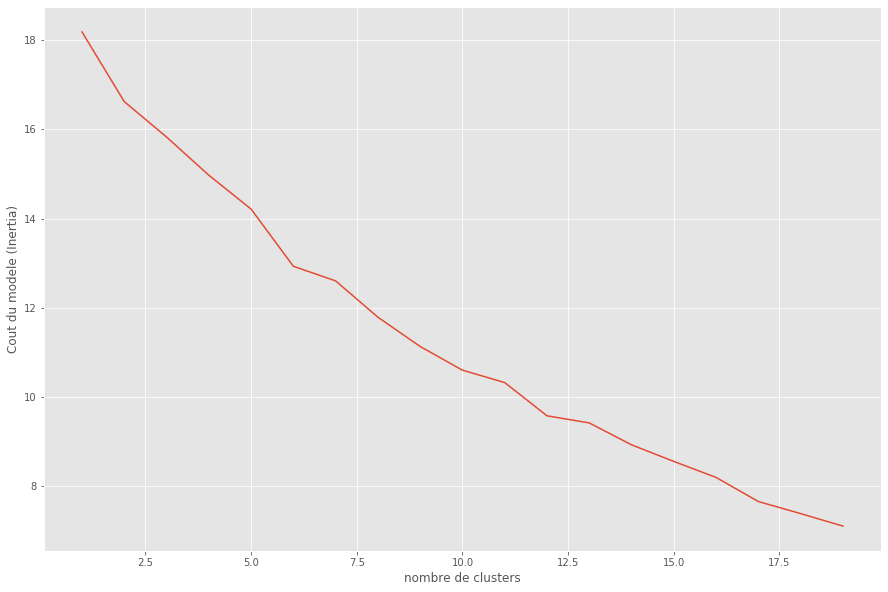

In [260]:
import matplotlib.pyplot as plt
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(lille_grouped_clustering)
    inertia.append(model.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.show()

In [261]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lille_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 0, 5, 2, 5, 5, 0, 5, 5, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [262]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lille_merged = lille_data2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lille_merged = lille_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lille_merged.head() # check the last columns!

valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                      
Annœullin           135000.0          1.0                 68.0   
Anstaing            227500.0          1.0                 65.0   
Armentières         136800.0          1.0                 48.0   
Aubers              184000.0          1.0                 95.0   
Baisieux            224000.0          1.0                 62.5   

             nombre_pieces_principales  Longitude   Latitude Neighborhood  \
nom_commune                                                                 
Annœullin                          3.0   2.934965  50.523184    Annœullin   
Anstaing                           2.5   3.189427  50.608145     Anstaing   
Armentières                        2.0   2.878428  50.684869  Armentières   
Aubers                             3.0   2.826927  50.593980       Aubers   
Baisieux                           3.0   3.230952  50.616673     Baisieux   

             Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
nom_commune                                                                
Annœullin               NaN                   NaN                    NaN   
Anstaing                5.0                 Plaza  Outdoors & Recreation   
Armentières             0.0     French Restaurant            Supermarket   
Aubers                  5.0                  Lake         Farmers Market   
Baisieux                2.0    Italian Restaurant          Train Station   

            3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
nom_commune                                                                     
Annœullin                     NaN                   NaN                   NaN   
Anstaing               Restaurant         Women's Store          Cocktail Bar   
Armentières        Sandwich Place         Train Station                Bakery   
Aubers              Women's Store            Food Court           Comedy Club   
Baisieux                      Gym           Supermarket         Women's Store   

                  6th Most Common Venue       7th Most Common Venue  \
nom_commune                                                           
Annœullin                           NaN                         NaN   
Anstaing                    Comedy Club  Construction & Landscaping   
Armentières           Mobile Phone Shop               Women's Store   
Aubers       Construction & Landscaping           Convenience Store   
Baisieux             Falafel Restaurant           Fish & Chips Shop   

                  8th Most Common Venue       9th Most Common Venue  \
nom_commune                                                           
Annœullin                           NaN                         NaN   
Anstaing              Convenience Store              Cosmetics Shop   
Armentières              Farmers Market  Financial or Legal Service   
Aubers                   Cosmetics Shop                       Diner   
Baisieux     Financial or Legal Service        Fast Food Restaurant   

            10th Most Common Venue  
nom_commune                         
Annœullin                      NaN  
Anstaing                     Diner  
Armentières   Fast Food Restaurant  
Aubers              Discount Store  
Baisieux            Farmers Market

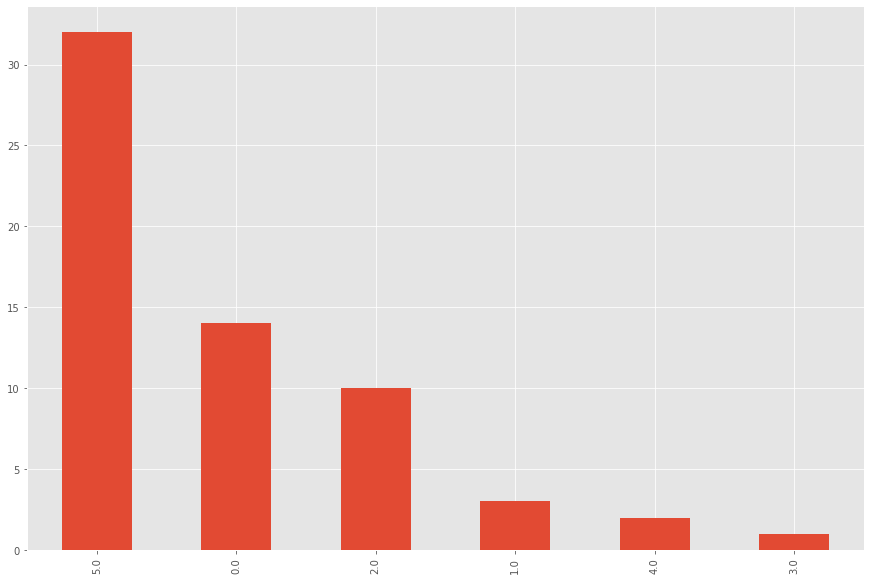

In [263]:
plt.figure(figsize=(15,10))
lille_merged['Cluster Labels'].value_counts().plot(kind = 'bar')

In [264]:
lille_merged['Cluster Labels'].isna().sum()

4

#### fill 8 NAs bys 11.0

In [265]:
lille_merged['Cluster Labels'].fillna(5.0, inplace = True)

#### We can plot the 1rst and the 2nd most common venues per clusters

Cluster Labels                 0.0     1.0    2.0    3.0    4.0     5.0
1st Most Common Venue                                                  
Athletics & Sports            0.00    0.00    0.0    0.0    0.0  100.00
Auto Workshop                 0.00  100.00    0.0    0.0    0.0    0.00
Automotive Shop               0.00    0.00  100.0    0.0    0.0    0.00
Bakery                        0.00    0.00    0.0    0.0    0.0  100.00
Bank                          0.00    0.00  100.0    0.0    0.0    0.00
Bar                         100.00    0.00    0.0    0.0    0.0    0.00
Bistro                      100.00    0.00    0.0    0.0    0.0    0.00
Bus Station                   0.00    0.00    0.0    0.0    0.0  100.00
Bus Stop                      0.00    0.00    0.0    0.0  100.0    0.00
Business Service              0.00    0.00    0.0    0.0    0.0  100.00
Construction & Landscaping    0.00    0.00    0.0    0.0    0.0  100.00
Convenience Store             0.00    0.00    0.0    0.0  100.0 

<Figure size 1080x720 with 0 Axes>

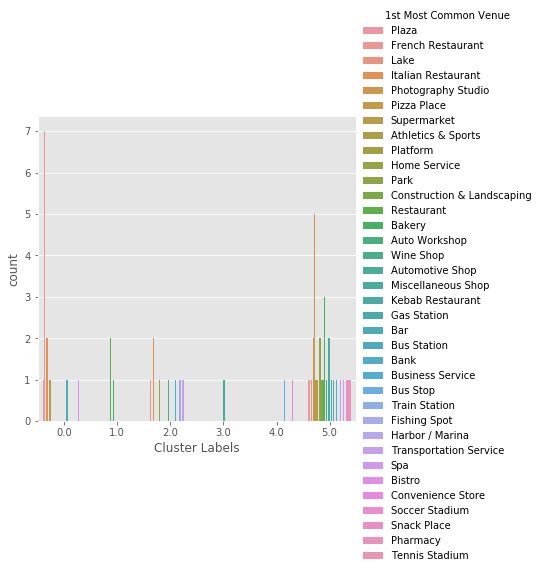

In [274]:
print(pd.crosstab(lille_merged["1st Most Common Venue"], lille_merged["Cluster Labels"], normalize = 'index').round(4)*100)
plt.figure(figsize = (15, 10))
sns.catplot(x = "Cluster Labels", hue = "1st Most Common Venue", kind = "count", data = lille_merged) #, hue="class" x = "Categorie", 
plt.show()

Finally, let's visualize the resulting clusters

In [266]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lille_merged['Latitude'], lille_merged['Longitude'], lille_merged['Neighborhood'], lille_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

---
## Examine Clusters
---

#### Cluster 1

In [267]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 0].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 0]

(14, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                                
Armentières                   136800.0          1.0                 48.0   
Bousbecque                    189000.0          1.0                 64.0   
Croix                         152000.0          1.0                 60.0   
Hem                           168160.0          1.0                 58.0   
Lambersart                    152375.0          2.0                 59.5   
Leers                         153000.0          1.0                 45.0   
Lille                         159662.5          1.0                 44.0   
Marcq-en-Barœul               177498.5          1.0                 65.0   
Roubaix                       139500.0          1.0                 49.0   
Saint-André-lez-Lille         151735.0          1.0                 57.0   
Santes                        169000.0          0.0                 40.0   
Vendeville                    149000.0          2.0                 74.0   
Wambrechies                   214000.0          1.0                 65.0   
Wasquehal                     184000.0          1.0                 64.0   

                       nombre_pieces_principales  Longitude   Latitude  \
nom_commune                                                              
Armentières                                  2.0   2.878428  50.684869   
Bousbecque                                   3.0   3.076585  50.773484   
Croix                                        3.0   3.152818  50.674386   
Hem                                          2.0   3.189052  50.652954   
Lambersart                                   3.0   3.024305  50.645557   
Leers                                        2.0   3.245681  50.677179   
Lille                                        2.0   3.058927  50.630345   
Marcq-en-Barœul                              3.0   3.091261  50.663180   
Roubaix                                      2.0   3.171455  50.688309   
Saint-André-lez-Lille                        3.0   3.051704  50.657258   
Santes                                       2.0   2.957633  50.595639   
Vendeville                                   3.0   3.079387  50.575015   
Wambrechies                                  3.0   3.053906  50.687924   
Wasquehal                                    3.0   3.130771  50.675420   

                                Neighborhood  Cluster Labels  \
nom_commune                                                    
Armentières                      Armentières             0.0   
Bousbecque                        Bousbecque             0.0   
Croix                                  Croix             0.0   
Hem                                      Hem             0.0   
Lambersart                        Lambersart             0.0   
Leers                                  Leers             0.0   
Lille                                  Lille             0.0   
Marcq-en-Barœul              Marcq-en-Barœul             0.0   
Roubaix                              Roubaix             0.0   
Saint-André-lez-Lille  Saint-André-lez-Lille             0.0   
Santes                                Santes             0.0   
Vendeville                        Vendeville             0.0   
Wambrechies                      Wambrechies             0.0   
Wasquehal                          Wasquehal             0.0   

                      1st Most Common Venue  2nd Most Common Venue  \
nom_commune                                                          
Armentières               French Restaurant            Supermarket   
Bousbecque                      Supermarket      French Restaurant   
Croix                     French Restaurant            Pizza Place   
Hem                       French Restaurant   Fast Food Restaurant   
Lambersart                French Restaurant             Playground   
Leers                                 Plaza   Fast Food Restaurant   
Lille                               

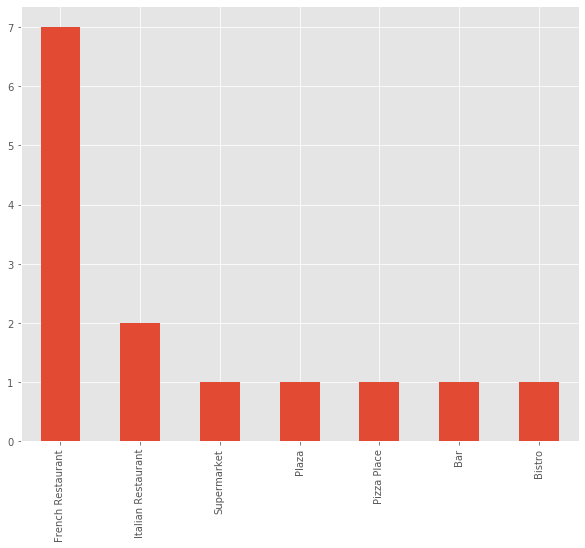

In [283]:
lille_merged.loc[lille_merged['Cluster Labels'] == 0]['1st Most Common Venue'].value_counts()[0:20].plot.bar(figsize=(10,8))

#### Cluster 2

In [268]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 1].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 1]

(3, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                            
Fournes-en-Weppes          80500.0          1.0                 42.0   
Fretin                    300000.0          0.0                 36.0   
Toufflers                 177500.0          0.0                 30.0   

                   nombre_pieces_principales  Longitude   Latitude  \
nom_commune                                                          
Fournes-en-Weppes                        2.5   2.887267  50.583945   
Fretin                                   2.0   3.124435  50.556647   
Toufflers                                2.0   3.234865  50.660670   

                        Neighborhood  Cluster Labels 1st Most Common Venue  \
nom_commune                                                                  
Fournes-en-Weppes  Fournes-en-Weppes             1.0            Restaurant   
Fretin                        Fretin             1.0         Auto Workshop   
Toufflers                  Toufflers             1.0            Restaurant   

                  2nd Most Common Venue 3rd Most Common Venue  \
nom_commune                                                     
Fournes-en-Weppes             Rest Area                Museum   
Fretin                       Restaurant         Women's Store   
Toufflers                 Women's Store           Flower Shop   

                  4th Most Common Venue       5th Most Common Venue  \
nom_commune                                                           
Fournes-en-Weppes         Women's Store                Cocktail Bar   
Fretin                      Flower Shop                 Comedy Club   
Toufflers                   Comedy Club  Construction & Landscaping   

                        6th Most Common Venue       7th Most Common Venue  \
nom_commune                                                                 
Fournes-en-Weppes                 Comedy Club  Construction & Landscaping   
Fretin             Construction & Landscaping           Convenience Store   
Toufflers                   Convenience Store              Cosmetics Shop   

                  8th Most Common Venue 9th Most Common Venue  \
nom_commune                                                     
Fournes-en-Weppes     Convenience Store        Cosmetics Shop   
Fretin                   Cosmetics Shop                 Diner   
Toufflers                         Diner        Discount Store   

                  10th Most Common Venue  
nom_commune                               
Fournes-en-Weppes                  Diner  
Fretin                    Discount Store  
Toufflers             Falafel Restaurant

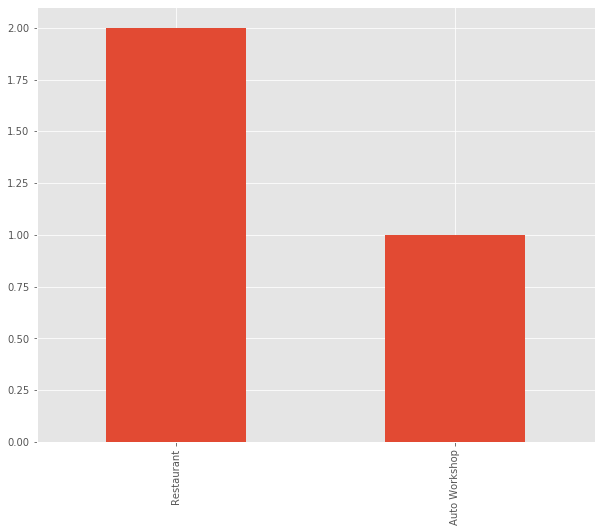

In [284]:
lille_merged.loc[lille_merged['Cluster Labels'] == 1]['1st Most Common Venue'].value_counts().plot.bar(figsize=(10,8))

#### Cluster 3

In [269]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 2].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 2]

(10, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                      
Baisieux          224000.000          1.0                 62.5   
Don               146156.000          1.0                 46.5   
Haubourdin        148503.135          1.0                 51.0   
Lesquin           201000.000          1.0                 57.0   
Loos              123000.000          1.0                 48.0   
Provin            166750.000          1.0                 52.0   
Pérenchies        140000.000          1.0                 38.0   
Ronchin           120000.000          1.0                 54.0   
Seclin            158500.000          1.0                 59.0   
Templemars        259350.000          0.0                 59.5   

             nombre_pieces_principales  Longitude   Latitude Neighborhood  \
nom_commune                                                                 
Baisieux                           3.0   3.230952  50.616673     Baisieux   
Don                                2.0   2.915016  50.550073          Don   
Haubourdin                         3.0   2.989031  50.610005   Haubourdin   
Lesquin                            3.0   3.114891  50.589610      Lesquin   
Loos                               2.0   3.018900  50.613283         Loos   
Provin                             2.5   2.907576  50.512334       Provin   
Pérenchies                         2.0   2.972070  50.666636   Pérenchies   
Ronchin                            2.0   3.084089  50.605007      Ronchin   
Seclin                             3.0   3.030351  50.549318       Seclin   
Templemars                         2.5   3.051147  50.577191   Templemars   

             Cluster Labels   1st Most Common Venue 2nd Most Common Venue  \
nom_commune                                                                 
Baisieux                2.0      Italian Restaurant         Train Station   
Don                     2.0                Platform            Food Court   
Haubourdin              2.0         Automotive Shop         Train Station   
Lesquin                 2.0      Italian Restaurant               Stadium   
Loos                    2.0                    Bank         Train Station   
Provin                  2.0           Train Station              Friterie   
Pérenchies              2.0            Fishing Spot           Supermarket   
Ronchin                 2.0  Transportation Service  Gym / Fitness Center   
Seclin                  2.0       French Restaurant         Train Station   
Templemars              2.0                     Spa         Train Station   

            3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
nom_commune                                                                     
Baisieux                      Gym           Supermarket         Women's Store   
Don                 Train Station      Business Service   Rental Car Location   
Haubourdin         Farmers Market         Women's Store          Fishing Spot   
Lesquin             Train Station           Auto Garage         Women's Store   
Loos                  Supermarket              Friterie         Women's Store   
Provin              Women's Store           Flower Shop           Comedy Club   
Pérenchies          Train Station                Bakery    Falafel Restaurant   
Ronchin             Train Station              Bus Stop         Women's Store   
Seclin                     Bakery         Women's Store    Falafel Restaurant   
Templemars            Flower Shop           Coffee Shop           Comedy Club   

                  6th Most Common Venue       7th Most Common Venue  \
nom_commune                                                           
Baisieux             Falafel Restaurant           Fish & Chips Shop   
Don                               Diner        Fast Food Restaurant   
Haubourdin            Fish & Chips Shop  Financial or Legal Service   
Lesquin              Falafel Restaurant   

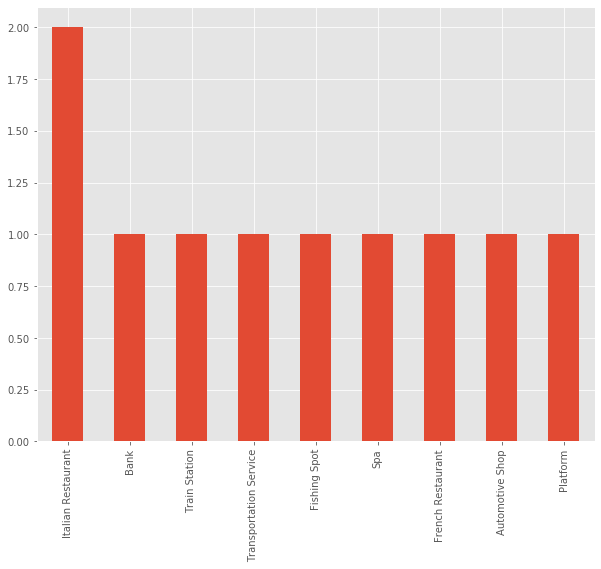

In [286]:
lille_merged.loc[lille_merged['Cluster Labels'] == 2]['1st Most Common Venue'].value_counts().plot.bar(figsize=(10,8))

#### Cluster 4

In [270]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 3].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 3]

(1, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                      
La Bassée           245000.0          0.0                 65.0   

             nombre_pieces_principales  Longitude   Latitude Neighborhood  \
nom_commune                                                                 
La Bassée                          3.0   2.801951  50.536493    La Bassée   

             Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
nom_commune                                                               
La Bassée               3.0      Kebab Restaurant         Women's Store   

            3rd Most Common Venue 4th Most Common Venue  \
nom_commune                                               
La Bassée              Food Court           Comedy Club   

                  5th Most Common Venue 6th Most Common Venue  \
nom_commune                                                     
La Bassée    Construction & Landscaping     Convenience Store   

            7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
nom_commune                                                                     
La Bassée          Cosmetics Shop                 Diner        Discount Store   

            10th Most Common Venue  
nom_commune                         
La Bassée       Falafel Restaurant

#### Cluster 5

In [271]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 4].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 4]

(2, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                              
Neuville-en-Ferrain         197000.0          1.0                 54.0   
Verlinghem                  179500.0          1.0                 50.0   

                     nombre_pieces_principales  Longitude   Latitude  \
nom_commune                                                            
Neuville-en-Ferrain                        2.0   3.175110  50.750244   
Verlinghem                                 2.0   2.993733  50.682950   

                            Neighborhood  Cluster Labels  \
nom_commune                                                
Neuville-en-Ferrain  Neuville-en-Ferrain             4.0   
Verlinghem                    Verlinghem             4.0   

                    1st Most Common Venue 2nd Most Common Venue  \
nom_commune                                                       
Neuville-en-Ferrain              Bus Stop         Women's Store   
Verlinghem              Convenience Store              Bus Stop   

                    3rd Most Common Venue 4th Most Common Venue  \
nom_commune                                                       
Neuville-en-Ferrain           Flower Shop           Comedy Club   
Verlinghem              French Restaurant         Women's Store   

                          5th Most Common Venue 6th Most Common Venue  \
nom_commune                                                             
Neuville-en-Ferrain  Construction & Landscaping     Convenience Store   
Verlinghem                          Flower Shop           Comedy Club   

                          7th Most Common Venue 8th Most Common Venue  \
nom_commune                                                             
Neuville-en-Ferrain              Cosmetics Shop                 Diner   
Verlinghem           Construction & Landscaping        Cosmetics Shop   

                    9th Most Common Venue 10th Most Common Venue  
nom_commune                                                       
Neuville-en-Ferrain        Discount Store     Falafel Restaurant  
Verlinghem                          Diner         Discount Store

#### Cluster 6

In [272]:
print(lille_merged.loc[lille_merged['Cluster Labels'] == 5].shape)
lille_merged.loc[lille_merged['Cluster Labels'] == 5]

(36, 18)


valeur_fonciere  nombre_lots  surface_reelle_bati  \
nom_commune                                                                    
Annœullin                         135000.0          1.0                 68.0   
Anstaing                          227500.0          1.0                 65.0   
Aubers                            184000.0          1.0                 95.0   
Bauvin                             55000.0          1.0                 79.0   
Bondues                           140750.0          1.0                 57.5   
Capinghem                         137000.0          1.0                 65.0   
Chéreng                           181400.0          0.5                 71.5   
Comines                           165000.0          1.0                 59.0   
Emmerin                           212500.0          2.0                100.0   
Erquinghem-Lys                    138000.0          1.0                 49.0   
Faches-Thumesnil                  134330.0          1.0                 52.0   
Forest-sur-Marque                 128000.0          1.0                 51.0   
Frelinghien                       229951.0          1.0                 55.0   
Hallennes-lez-Haubourdin          182000.0          1.0                 59.0   
Halluin                           133000.0          1.0                 50.0   
Houplines                          87000.0          0.0                 51.0   
La Chapelle-d'Armentières         145000.0          1.0                 71.0   
La Madeleine                      167500.0          1.0                 60.0   
Lannoy                            102250.0          1.0                 47.0   
Linselles                         175750.0          1.0                 67.0   
Lys-lez-Lannoy                    128250.0          1.0                 62.0   
Marquette-lez-Lille               153750.0          1.0                 60.0   
Mons-en-Barœul                     90000.0          1.0                 53.0   
Mouvaux                           201700.0          1.0                 72.0   
Prémesques                        200000.0          0.0                 52.0   
Quesnoy-sur-Deûle                 205300.0          1.0                 65.0   
Roncq                             180950.0          1.0                 66.5   
Sainghin-en-Weppes                280000.0          0.0                 46.0   
Sequedin                          214000.0          1.0                 64.0   
Tourcoing                         122000.0          1.0                 57.0   
Villeneuve-d'Ascq                 122650.0          1.0                 54.0   
Wattignies                        107300.0          1.0                 62.0   
Wattrelos                         104400.0          1.0                 60.0   
Wavrin                            151000.0          1.0                 77.5   
Wervicq-Sud                       125000.0          1.0                 47.0   
Willems                           195400.0          3.0                 65.0   

                           nombre_pieces_principales  Longitude   Latitude  \
nom_commune                                                                  
Annœullin                                        3.0   2.934965  50.523184   
Anstaing                                         2.5   3.189427  50.608145   
Aubers                                           3.0   2.826927  50.593980   
Bauvin                                           3.0   2.898195  50.514374   
Bondues                                          2.5   3.094160  50.700167   
Capinghem                                        3.0   2.969553  50.651468   
Chéreng                                          3.0   3.210203  50.613831   
Comines                                          3.0   3.006841  50.762846   
Emmerin                                          3.0   2.999054  50.592176   
Erquinghem-Lys                                   2.0   2.847350  50.678022   
Faches-Thumesnil                                 3

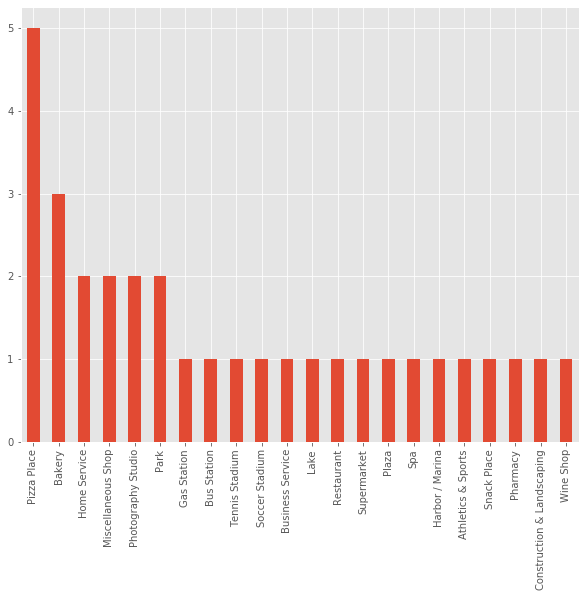

In [287]:
lille_merged.loc[lille_merged['Cluster Labels'] == 5]['1st Most Common Venue'].value_counts().plot.bar(figsize=(10,8))

In [273]:
lille_merged.groupby('Cluster Labels').mean()

valeur_fonciere  nombre_lots  surface_reelle_bati  \
Cluster Labels                                                      
0.0               163980.785714     1.071429            56.607143   
1.0               186000.000000     0.333333            36.000000   
2.0               168725.913500     0.900000            52.750000   
3.0               245000.000000     0.000000            65.000000   
4.0               188250.000000     1.000000            52.000000   
5.0               156739.750000     0.986111            62.083333   

                nombre_pieces_principales  Longitude   Latitude  
Cluster Labels                                                   
0.0                              2.571429   3.082994  50.662966  
1.0                              2.166667   3.082189  50.600421  
2.0                              2.500000   3.031402  50.589013  
3.0                              3.000000   2.801951  50.536493  
4.0                              2.000000   3.084422  50.716597  
5.0                              2.694444   3.046087  50.655908

In [ ]:
# Cluster 1 --> prix élevés
#  --> prix moyen
# --> prix bas